<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Customise/DataPipeline/Data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU numpy pandas matplotlib seaborn scikit-learn
pip install --no-cache-dir -qU tensorflow pydot
pip check

No broken requirements found.


In [7]:
import os
import numpy as np
import pandas as pd
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"x train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")

x train shape: (60000, 28, 28)
y train shape: (60000,)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"x test shape: {x_test.shape}")
print(f"y test shape: {y_test.shape}")

x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    num_words=1000, maxlen=100)

print(f"x train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")

x train shape: (2773,)
y train shape: (2773,)


#### Load the CIFAR-100 Dataset

In [2]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 3s 0us/step


In [3]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [4]:
# Examine the shape of the data.

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape}")
print(f" test labels shape: {test_labels.shape}")

train images shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)
test images shape: (10000, 32, 32, 3)
 test labels shape: (10000, 1)


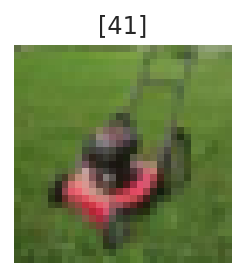

In [12]:
# Examine one of the images and its corresponding label

plt.figure(figsize=(2, 2))
plt.imshow(train_images[500])
plt.title(str(train_labels[500]))
plt.axis('off')
plt.show()

In [6]:
os.makedirs('./data', exist_ok=True)

In [8]:
# Load the list of labels from a JSON file

with open('./data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [9]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [10]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[41])

lawn_mower


#### Load the data using different label modes

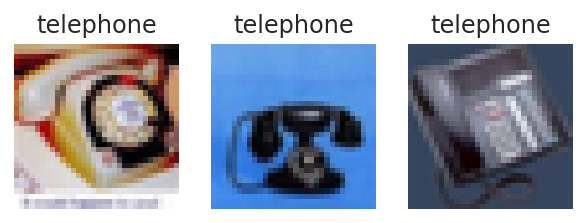

In [19]:
# Display a few examples from category 87 (index 86) 
# and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1, 3, figsize=(5, 5))
for i, img in enumerate(examples):
    ax[i].imshow(img)
    ax[i].set_title(cifar100_fine_labels[86])
    ax[i].axis('off')
plt.show()

In [ ]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode='coarse')

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")

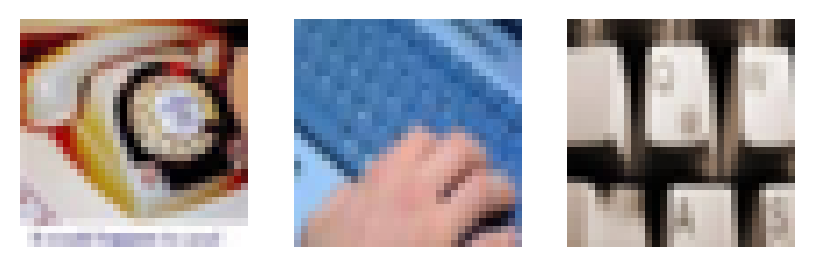

In [ ]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1, 3, figsize=(5, 5))
for i, img in enumerate(examples):
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

In [ ]:
# Load the list of coarse labels from a JSON file

with open('./data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [ ]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [ ]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [ ]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 11s 1us/step


In [ ]:
# Print an example from the training dataset, 
# along with its corresponding label

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [ ]:
# Load the data ignoring the 50 most frequent words, 
# use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(skip_top=50, oov_char=2)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [ ]:
# Remove the oov_char from the sequences using 
# the filter_list function

train_data = filter_list(train_data)

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [ ]:
def text_file_reader(filepath):
    with open(filepath, 'r') as f:
        for row in f:
            yield row
            
text_datagen = text_file_reader('data_file.txt')

next(text_datagen) # 'A line of text\n'
next(text_datagen) # 'Another line of text\n'

In [ ]:
import numpy as np

def get_data(batch_size):
    while True:
        y_train = np.random.choice([0, 1], (batch_size, 1))
        x_train = np.random.randn(batch_size, 1) + (2*y_train - 1)
        yield x_train, y_train
        
datagen = get_data(32)

x, y = next(datagen)

for e in zip(x, y):
    print(e[0], e[1])

[0.9455716] [1]
[-0.01436574] [1]
[-0.38447078] [1]
[1.70750341] [1]
[0.35515607] [1]
[0.26230633] [0]
[-1.64544476] [0]
[1.10386206] [1]
[0.94684232] [1]
[1.16943274] [1]
[0.73662998] [1]
[-0.39931175] [0]
[-1.01485673] [0]
[1.79247383] [1]
[-1.03362635] [0]
[2.76554881] [1]
[0.7871554] [1]
[-1.22615825] [0]
[-0.86118921] [1]
[3.14480565] [1]
[-0.98091368] [0]
[-0.56353457] [0]
[-1.42038854] [1]
[-0.13387891] [1]
[0.79976492] [1]
[2.80686659] [1]
[-0.27042601] [0]
[2.69129775] [1]
[-3.04562021] [0]
[-0.64030199] [0]
[2.99762212] [1]
[-2.70741372] [0]


#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file for use in this Colab notebook.

In [ ]:
data_dir = "./data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [ ]:
%%bash

fileid="1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV"
filename="./data/fertility_diagnosis.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

rm ./cookie

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3517      0 --:--:-- --:--:-- --:--:--  3547
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2941  100  2941    0     0  10772      0 --:--:-- --:--:-- --:--:-- 10772


In [ ]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 
    'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', 
    header=None, names=headers)

In [ ]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [ ]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [ ]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [ ]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.0,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0
1,1.0,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0
2,1.0,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0
3,1.0,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0
4,1.0,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0


In [ ]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0,0,0,0,1
2,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0,0,0,0,1
3,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
4,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0,0,0,0,1


In [ ]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [ ]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0,0,0,0,1
2,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0,0,0,0,1
3,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
4,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,1.0,0,0,0,1


In [ ]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()
fertility

array([[0.53, 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.58, 1.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.58, 1.  , 1.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.69, 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.75, 1.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.67, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

#### Split the Data

In [ ]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [ ]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [ ]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [ ]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], 
            labels[n*batch_size: (n+1)*batch_size])

In [ ]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.53,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.5 ,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.44,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  0.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  0.8 ,  1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.5 ,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.44,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.61,  1.  ,  0.  ,  0.  ,  0.  ,  0.8 ,  0.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.5 ,  0.  ,
 

#### Build the model

In [ ]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [ ]:
# Display the model summary to show the resultant structure

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [ ]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [ ]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, 
    loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [ ]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [ ]:
# Set the epochs to 3

epochs = 3

In [ ]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, 
        training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, 
        validation_labels, batch_size=30)
    model.fit_generator(train_generator, steps_per_epoch=train_steps, 
        validation_data=validation_generator, validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
14/14 [==============================] - 0s 6ms/step - loss: 0.1471 - accuracy: 0.9571 - val_loss: 0.0687 - val_accuracy: 0.9667


In [ ]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

StopIteration: ignored

#### Make an infinitely looping generator

In [ ]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], 
                labels[n*batch_size: (n+1)*batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [ ]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, 
    training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [ ]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, 
    validation_labels, batch_size=batch_size)

In [ ]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, 
    validation_data=validation_generator_cyclic, validation_steps=1, epochs=3)

Epoch 1/3
14/14 [==============================] - 0s 5ms/step - loss: 0.0862 - accuracy: 0.9714 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 4ms/step - loss: 0.1078 - accuracy: 0.9571 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.9714 - val_loss: 0.0019 - val_accuracy: 1.0000


for _ in range(10000):

    x_train, y_train = next(datagen)
    
    model.train_on_batch(x_train, y_train)

#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, 
    validation_labels, batch_size=30)

In [ ]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

Instructions for updating:
Please use Model.predict, which supports generators.
[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0.]


In [ ]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0.]


In [ ]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, 
    validation_labels, batch_size=30)

In [ ]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 0s 32ms/step - loss: 0.0040 - accuracy: 1.0000
[0.003959147725254297, 1.0]


In [ ]:
batch_size = 5
steps = len(validation) // batch_size

validation_generator = get_generator(validation_features, 
    validation_labels, batch_size=batch_size)
model.evaluate_generator(validation_generator, steps=steps)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.0039591481909155846, 1.0]

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

### Reference

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

image_data_gen = ImageDataGenerator(rescale=None, 
    horizontal_flip=True, height_shift_range=0.2, fill_mode='nearest',
    featurewise_center=True)

image_data_gen.fit(x_train)

train_datagen = image_data_gen.flow(x_train, y_train, batch_size=16)

model.fit_generator(train_datagen, epochs=20)

#### Load the CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = \
    cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], 
            labels[n*batch_size:(n+1)*batch_size])

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


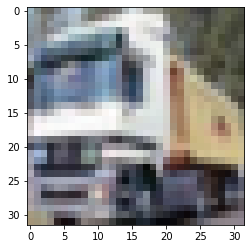

In [ ]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [ ]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180,
    rescale=(1/255.0))

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [ ]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features,
    training_labels, batch_size=1, shuffle=False)

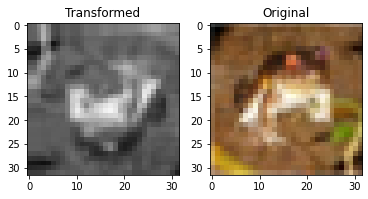

In [ ]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files for use in this Colab notebook.

In [ ]:
data_dir = "./data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [ ]:
%%bash

fileid="11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd"
filename="./data/flowers-recognition-split.zip"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

unzip -qq ./data/flowers-recognition-split.zip -d ./data
rm -rf ./cookie ./data/flowers-recognition-split.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   4483      0 --:--:-- --:--:-- --:--:--  4483
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  226M    0  226M    0     0  33.1M      0 --:--:--  0:00:06 --:--:-- 53.8M


In [ ]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path,
    batch_size=64, classes=classes, target_size=(16, 16))

Found 3027 images belonging to 5 classes.


In [ ]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path,
    batch_size=64, classes=classes, target_size=(16,16))

Found 1296 images belonging to 5 classes.


[1. 0. 0. 0. 0.]


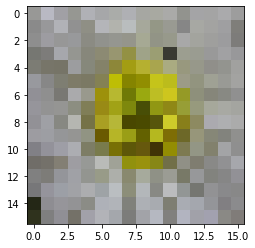

In [ ]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [ ]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path,
    batch_size=64, classes=classes, target_size=(16, 16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [ ]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# Compile the model

model.compile(optimizer=optimizer, 
    loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [ ]:
# Fit the model

model.fit_generator(train_generator, 
    steps_per_epoch=train_steps_per_epoch, epochs=5)

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 1.5928 - accuracy: 0.2383
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 1.5423 - accuracy: 0.2994
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 1.4935 - accuracy: 0.3156
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 1.4610 - accuracy: 0.3307
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 1.4393 - accuracy: 0.3480


#### Evaluate the model

In [ ]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

[1.425450086593628, 0.37031251192092896]

#### Predict using the generator

In [ ]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))

[[0.17 0.25 0.22 0.1  0.26]
 [0.29 0.32 0.16 0.05 0.19]
 [0.04 0.11 0.17 0.36 0.32]
 [0.2  0.29 0.2  0.07 0.24]
 [0.17 0.27 0.22 0.08 0.26]
 [0.05 0.17 0.36 0.1  0.32]
 [0.11 0.17 0.18 0.26 0.29]
 [0.18 0.24 0.21 0.11 0.25]
 [0.21 0.25 0.19 0.12 0.23]
 [0.25 0.26 0.19 0.1  0.2 ]
 [0.29 0.39 0.14 0.02 0.16]
 [0.01 0.06 0.13 0.44 0.36]
 [0.06 0.12 0.14 0.4  0.28]
 [0.05 0.12 0.14 0.36 0.33]
 [0.23 0.25 0.19 0.12 0.21]
 [0.03 0.09 0.11 0.46 0.3 ]
 [0.13 0.17 0.18 0.26 0.25]
 [0.19 0.22 0.2  0.15 0.23]
 [0.06 0.13 0.16 0.33 0.32]
 [0.28 0.31 0.17 0.06 0.19]
 [0.27 0.3  0.17 0.06 0.2 ]
 [0.12 0.17 0.18 0.25 0.29]
 [0.23 0.27 0.19 0.09 0.22]
 [0.08 0.15 0.18 0.29 0.3 ]
 [0.24 0.35 0.17 0.04 0.2 ]
 [0.15 0.21 0.19 0.17 0.28]
 [0.28 0.31 0.16 0.05 0.19]
 [0.07 0.15 0.18 0.29 0.31]
 [0.27 0.3  0.18 0.07 0.18]
 [0.05 0.12 0.16 0.34 0.33]
 [0.16 0.2  0.18 0.21 0.26]
 [0.03 0.08 0.11 0.47 0.3 ]
 [0.04 0.11 0.18 0.34 0.33]
 [0.15 0.2  0.2  0.18 0.27]
 [0.16 0.23 0.18 0.13 0.3 ]
 [0.21 0.23 0.2  0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
    [[1,2],[3,4],[5,6]])
print(dataset)

for elem in dataset:
    print(elem.numpy())

<TensorSliceDataset shapes: (2,), types: tf.int32>
[1 2]
[3 4]
[5 6]


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([256,4], minval=1, maxval=10, dtype=tf.int32),
    tf.random.normal([256])))

print(dataset.element_spec)

for elem in dataset.take(2):
    print(elem)

(TensorSpec(shape=(4,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([7, 3, 4, 6], dtype=int32)>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08878488>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([2, 5, 8, 5], dtype=int32)>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30734274>)


In [ ]:
x = np.zeros((100,10,2,2))

In [ ]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [ ]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec)

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [ ]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [ ]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: ignored

In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [ ]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [ ]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [ ]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

print(dataset.element_spec)

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_datagen = ImageDataGenerator(rescale=1/255., 
    width_shift_range=0.2, horizontal_flip=True)

dataset = tf.data.Dataset.from_generator(img_datagen.flow, 
    args=[x_train, y_train], output_types=(tf.float32, tf.int32),
    output_shapes=([32,32,32,3], [32,1]))

print(dataset.element_spec)

for elem in dataset.take(2):
    print(elem)

(TensorSpec(shape=(32, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))
(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[0.6313726 , 0.61960787, 0.69411767],
         [0.6313726 , 0.61960787, 0.69411767],
         [0.6208105 , 0.6069334 , 0.6835556 ],
         ...,
         [0.7272994 , 0.7176471 , 0.75867194],
         [0.72971505, 0.7197595 , 0.7589752 ],
         [0.7354458 , 0.7236811 , 0.76500916]],

        [[0.6       , 0.58431375, 0.6666667 ],
         [0.6       , 0.58431375, 0.6666667 ],
         [0.5809883 , 0.565302  , 0.64765495],
         ...,
         [0.69652295, 0.669072  , 0.71794   ],
         [0.65941966, 0.6340811 , 0.6874772 ],
         [0.672711  , 0.65129405, 0.71856725]],

        [[0.60784316, 0.58431375, 0.6745098 ],
         [0.60784316, 0.58431375, 0.6745098 ],
         [0.58249426, 0.55896485, 0.6491609 ],
         ...,
         [0.7840105 , 0.7390641 , 0.7794824 ],
         [0.7085702 , 0.6

In [ ]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = \
    tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices(
    (train_features, train_labels))

In [ ]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [ ]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [ ]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files for use in this Colab notebook.

In [ ]:
data_dir = "./data/shakespeare/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [ ]:
%%bash

fileid="1mJh2gG4wvu0Xpc9izupXio4W1eAvEFBY"
filename="./data/shakespeare/tempest.1.1.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="14RDC57HJud936KU0yS5JTjtbsVC5Bw2m"
filename="./data/shakespeare/tempest.1.2.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="1aMOc8j4l1qKMEOtXv7pQDl16kYhCeqYc"
filename="./data/shakespeare/tempest.2.1.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="17Jm_sZu_ps81WiGKCCWmrfU5XADwDw--"
filename="./data/shakespeare/tempest.2.2.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="1XeIYfj6VDmKamMduanCIAD0tydmnWjlP"
filename="./data/shakespeare/tempest.3.1.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="1v30JPWBvWfOiQvzAwfKG9p8-mrQP5g3l"
filename="./data/shakespeare/tempest.3.2.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="1-GJTQ5DD3AFQ9NDkgOAHd3JIK9akTKLC"
filename="./data/shakespeare/tempest.3.3.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="19J-8dYnKHqUsIEzPnTL-6ZiP8e-j8-Ha"
filename="./data/shakespeare/tempest.4.1.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

fileid="1mNYhA47xl5zHQBDXd7fqDlvwtB-OEFvp"
filename="./data/shakespeare/tempest.5.1.txt"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

rm -rf ./cookie

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1320      0 --:--:-- --:--:-- --:--:--  1316
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3304  100  3304    0     0   6812      0 --:--:-- --:--:-- --:--:--  6812
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1275      0 --:--:-- --:--:-- --:--:--  1275
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23402  100 23402    0     0  48451      0 --:--:-- --:--:-- --:--:-- 48451
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [ ]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [ ]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [ ]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [ ]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [ ]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [ ]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(
    tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [ ]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files for use in this Colab notebook.

In [ ]:
data_dir = "./data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [ ]:
%%bash

fileid="1nKvYzcXlEds31FCVaT9INPrbJbn3dVz-"
filename="./data/bank-full.csv"
curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}" > /dev/null
curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=${fileid}" -o ${filename}

rm -rf ./cookie

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    474      0 --:--:-- --:--:-- --:--:--   474
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4502k    0 4502k    0     0  3935k      0 --:--:--  0:00:01 --:--:-- 3935k


In [ ]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 
    'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(
        bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [ ]:
# Convert the DataFrame to a Dataset

dict_bank = dict(bank_dataframe)
bank_dataset = tf.data.Dataset.from_tensor_slices(
    {k: dict_bank[k].tolist() for k in dict_bank})

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], 
    tf.constant([b'divorced']))[0])

In [ ]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [ ]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x: 
    {key: val for key, val in x.items() if key != 'marital'})

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], 
        x['default'], x['education'], x['housing'], x['job'], x['loan'], 
        [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [ ]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length*0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, 
    loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 400)               12400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
____________________________________________

#### Train the model

In [ ]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [ ]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [ ]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset,
    epochs=5)

Epoch 1/5
182/182 [==============================] - 2s 10ms/step - loss: 0.6621 - accuracy: 0.6412 - val_loss: 0.6690 - val_accuracy: 0.7287
Epoch 2/5
182/182 [==============================] - 2s 9ms/step - loss: 0.4805 - accuracy: 0.8220 - val_loss: 0.5674 - val_accuracy: 0.7978
Epoch 3/5
182/182 [==============================] - 2s 12ms/step - loss: 0.3761 - accuracy: 0.8967 - val_loss: 0.4623 - val_accuracy: 0.8439
Epoch 4/5
182/182 [==============================] - 2s 10ms/step - loss: 0.3047 - accuracy: 0.9173 - val_loss: 0.4082 - val_accuracy: 0.8720
Epoch 5/5
182/182 [==============================] - 2s 9ms/step - loss: 0.2575 - accuracy: 0.9247 - val_loss: 0.3935 - val_accuracy: 0.8733


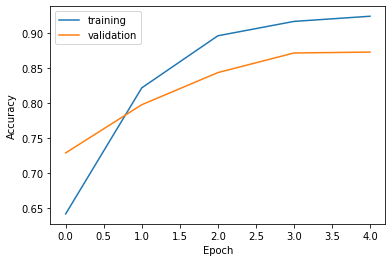

In [ ]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Reference

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

def rescale(image, label):
    return image/255, label

dataset = dataset.map(rescale)

def label_filter(image, label):
    return tf.squeeze(label) != 9

dataset = dataset.filter(label_filter)

dataset = dataset.shuffle(100)

dataset = dataset.batch(16, drop_remainder=True)

dataset = dataset.repeat(10)

print(dataset.element_spec)

history = model.fit(dataset)